## 1.用于回归的线性模型

线性模型预测的一般公式：    

y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b

这里x[0]到x[p]表示单个数据点的特征(本例中特征个数为p+1个)，w和b是学习模型的参数，y是模型的预测结果。对于单一特征的数据集，公式如下:      
y=w[0]*x[0]+b

w[0]: 0.393906  b: -0.031804


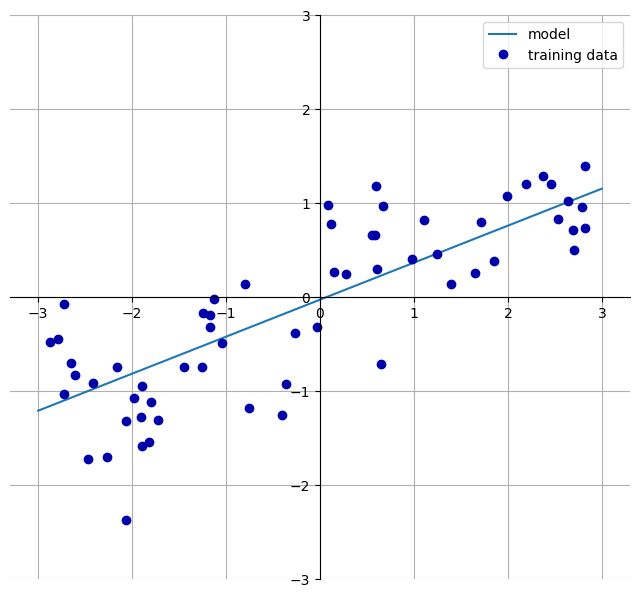

In [1]:
# 在一维wave数据集上学习参数w[0]和b
import mglearn
mglearn.plots.plot_linear_regression_wave() # 线性模型对wave数据集的预测结果

用于回归的线性模型可以表示为这样的回归模型:对单一特征的预测结果是一条直线，两个特征时是一个平面，或者在更高维度(即更多特征) 时是一个超平面

直线的预测能力非常受限。似乎数据的所有细节都丢失了。但观察一维数据得出的观点有些片面。对于有多个特征的数据集而言，线性模型可以非常强大。特别地，如果特征数量大于训练数据点的数量，任何目标，都可以(在训练集上)用线性函数完美拟合。

## 2.线性回归（普通最小二乘法）

线性回归寻找参数 w和b，使得对训练集的预测值与真实的回归目标值y之间的均方误差最小。均方误差(mean squared error) 是预测值与真实值之差的平方和除以样本数。线性回归没有参数，这是一个优点，但也因此无法控制模型的复杂度。

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60) #n_samples=60：此参数指定数据集中所需的数据点或样本数。
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("【斜率参数，也叫权重或系数】lr.coef_ :{}".format(lr.coef_)) #斜率
print("【截距或偏移】lr.intercept_ :{}".format(lr.intercept_)) #截距

【斜率参数，也叫权重或系数】lr.coef_ :[0.39390555]
【截距或偏移】lr.intercept_ :-0.031804343026759746


In [3]:
# 训练集和测试集性能
print("训练集：{:.2f}".format(lr.score(X_train,y_train)))
print("测试集：{:.2f}".format(lr.score(X_test,y_test)))

训练集：0.67
测试集：0.66


R^2约为0.66，这个结果不是很好，但我们可以看到，训练集和测试集上的分数非常接近这说明可能存在欠拟合，而不是过拟合。对于这个一维数据集来说，过拟合的风险很小,因为模型非常简单(或受限)。然而，对于更高维的数据集 (即有大量特征的数据集)，线性模型将变得更加强大，过拟合的可能性也会变大。

In [4]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


In [5]:
# 训练集和测试集性能
print("训练集：{:.2f}".format(lr.score(X_train, y_train)))
print("测试集:{:.2f}".format(lr.score(X_test, y_test)))

训练集：0.95
测试集:0.61


练集和测试集之间的性能差异是过拟合的明显标志，因此我们应该试图找到一个可以控制复杂度的模型。标准线性回归最常用的替代方法之一就是岭回归 (ridge regression)

## 3. 岭回归

岭回归也是一种用于回归的线性模型，因此它的预测公式与普通最小二乘法相同。但在岭回归中，对系数(w)的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加约束。我们还希望系数尽量小。换句话说，w的所有元素都应接近于0。直观上来看，这意味着每个特征对输出的影响应尽可能小(即斜率很小)，同时仍给出很好的预测结果。这种约束是所谓正则化(regularization)的一个例子。正则化是指对模型做显式约束，以避免过拟合。岭回归用到的这种被称为 L2 正则化

岭回归在linear_model.Ridge中实现

In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("Train set score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test,y_test)))

Train set score:0.89
Test set score:0.75


可以看出，Ridge 在训练集上的分数要低于 LinearRegression，但在测试集上的分数更高这和我们的预期一致。线性回归对数据存在过拟合。Ridge 是一种约束更强的模型，所以更不容易过拟合。复杂度更小的模型意味着在训练集上的性能更差，但泛化性能更好。由于我们只对泛化性能感兴趣，所以应该选择 Ridge模型而不是 LinearRegression 模型。

Ridge 模型在模型的简单性 (系数都接近于0) 与训练集性能之间做出权衡。简单性和训练集性能二者对于模型的重要程度可以由用户通过设置 alpha 参数来指定。在前面的例子中.我们用的是默认参数 alpha=1.0。但没有理由认为这会给出最佳权衡。alpha 的最佳设定值取决于用到的具体数据集。增大 alpha 会使得系数更加趋向于0，从而降低训练集性能.但可能会提高泛化性能。

In [7]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Train set score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test, y_test)))

Train set score:0.79
Test set score:0.64


对于一个非常小的alpha值，系数几乎没有受到限制，得到一个与LinearRegression相似的模型

In [8]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Train set score:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test, y_test)))

Train set score:0.93
Test set score:0.77


查看 alpha 取不同值时模型的 coef_属性，从而更加定性地理解alpha 参数是如何改变模型的。更大的 alpha 表示约束更强的模型，所以我们预计大 alpha 对应的 coef_元素比小alpha对应的 coef_元素要小。(coef_ 截距)

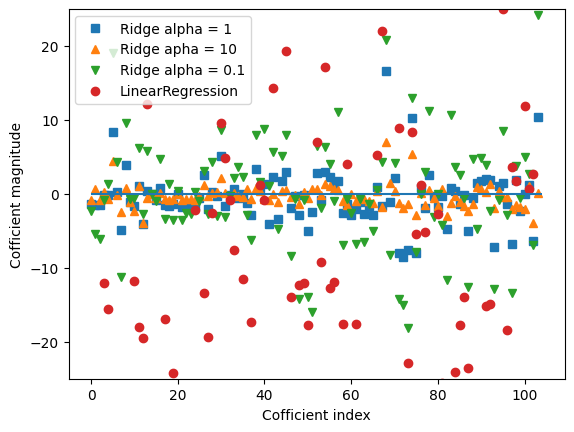

In [9]:
# 不同alpha值的岭回归与线性回归的系数比较
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label = "Ridge apha = 10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o',label = "LinearRegression")
plt.xlabel("Cofficient index")
plt.ylabel("Cofficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

这里x轴对应coef_的元素:x=0 对应第一个特征的系数，x=1对应第二个特征的系数，以此类推，一直到 x=100。r轴表示该系数的具体数值。    
对于 alpha=10.系数大多在-3和3之间。    
对于alpha=1的Ridge 模型，系数要稍大一点。对于alpha=0.1.点的范围更大。    
对于没有做正则化的线性回归 (即 alpha=0)，点的范围很大，许多点都超出了图像的范围。

还有一种方法可以理解正则化的影响，固定alpha值，但改变训练数据量

对波士顿房价数据集做二次抽样，并在数据量逐渐增加的子数据集上分别对LinearRegression和Ridge(alpha=1)两个模型进行评估 (将模型性能作为数据集大小的函数进行绘图、这样的图像叫作学习曲线):

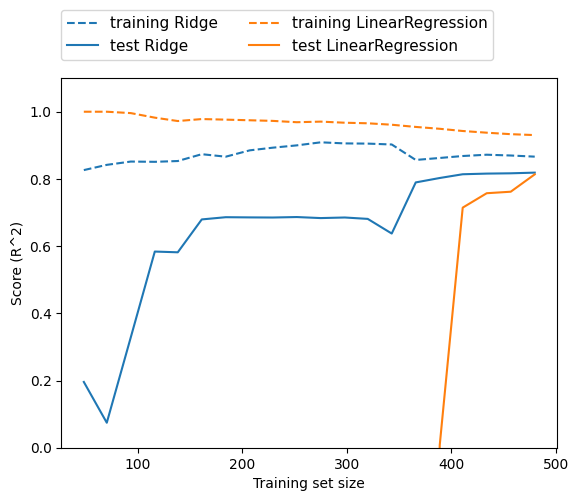

In [10]:
# 岭回归和线性回归在波士顿房价上的学习曲线
mglearn.plots.plot_ridge_n_samples()

无论是线性回归还是岭回归，所有数据集大小对应的训练分数都要高于测试分数。由于岭回归是正则化的，因此它的训练分数要整体低于线性回归的训练分。但岭回归的测试分数要更高，特别是对较小的子数据集。如果少于 400 个数据点，线生回归学不到任何内容。随着模型可用的数据越来越多，两个模型的性能都在提升，最终性回归的性能追上了岭回归。这里要记住的是，如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归将具有相同的性能

## 4. lasso

除了Ridge,还有一种正则化的方法是Lasso。与岭回归相同，使用lasso也是约束系数使其接近与0，但用到的方法不同，叫做L1正则化。

L1正则化的结果是，使用lasso时，某些系数刚好为0。这说明某些特征被模型完全忽略，这可以看作一种自动化的特征选择。某些系数刚好为0，这样模型更容易解释，也可以呈现模型最重要的特征。

In [11]:
# lasso在波士顿房价上的应用
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print("Train set score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso.coef_ != 0)))

Train set score:0.29
Test set score:0.21
Number of features used:4


Lasso 在训练集与测试集上的表现都很差。这表示存在欠拟合，我们发现模型只用到了105个特征中的4个。与Ridge 类似，Lasso也有一个正则化参数 alpha，可以控制系数趋向于0的强度。在上一个例子中，我们用的是默认值 alpha=1.0。为了降低欠拟合，我们尝试减小alpha。这么做的同时，我们还需要增加max_iter 的值 (运行选代的最大次数)

In [12]:
# 减小alpha，增大max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Train set score:{:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_ != 0)))

Train set score:0.90
Test set score:0.77
Number of features used:33


alpha变小，可以拟合一个更复杂的模型，在训练集和测试集上的表现也更好，模型的性能也比Ridge时好一点，但如果把alpha设的太小，就会出现消除正则化的效果，出现过拟合，得到与LinearRegression类似的结果

In [13]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Train set score:{:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso0001.coef_ != 0)))

Train set score:0.95
Test set score:0.64
Number of features used:96


Text(0, 0.5, 'cofficient magnitude')

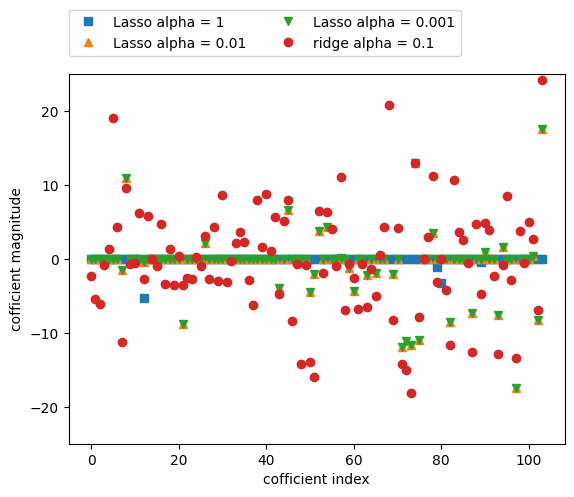

In [14]:
# 不同alpha值的lasso回归和岭回归的系数比较
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso001.coef_, 'v', label = "Lasso alpha = 0.001")

plt.plot(ridge01.coef_, 'o', label = "ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("cofficient index")
plt.ylabel("cofficient magnitude")

在alpha=1时，大部分系数都是0，其他系数也都很小。将alpha 减小至0.01，大部分特征等于0。alpha=0.0001时，我们得到正则化很弱的模型，大部分系数都不为0，并且还很大。alpha=0.1的Rdge 模型的预测性能与alpha=0.01的Lasso模型类似，但Ridge模型的所有系数都不为0。

在实践中，在两个模型中一般首选岭回归。但如果特征很多，你认为只有其中几个是重要的，那么选择Lasso可能更好。同样，如果你想要一个容易解释的模型，Lasso可以给出更容易理解的模型，因为它只选择了一部分输入特征。scikit-learn还提供了ELasticNet类，结合了Lasso和Ridge 的惩罚项。在实践中，这种结合的效果最好，不过代价是要调节两个参数:一个用于L1正则化，一个用于L2 正则化。

## 5. 用于分类的线性模型

线性模型也广泛应用于分类问题。我们首先来看二分类。这时可以利用下面的公式进行预测:     
F=w[0]*x[0]+w[1]*x[1]+··+w[p]*x[p]+b>0


这个公式看起来与线性回归的公式非常相似，但我们没有返回特征的加权求和，而是为预测设置了阂值(0)。如果函数值小于0，我们就预测类别-1;如果函数值大于0，我们就预测类别 +1。对于所有用于分类的线性模型，这个预测规则都是通用的。同样，有很多种不同的方法来找出系数(w)和截距(b)。

对于用于回归的线性模型，输出了是特征的线性函数，是直线、平面或超平面(对于更高维的数据集)。对于用于分类的线性模型，决策边界是输入的线性函数。换句话说，(二元)线性分类器是利用直线、平面或超平面来分开两个类别的分类器。

学习线性模型有很多种算法。这些算法的区别在于以下两点:    
--系数和截距的特定组合对训练数据拟合好坏的度量方法(损失函数)    
--是否使用正则化，以及使用哪种正则化方法。

最常见的两种线性分类算法是Logistic 回归(ogistic regression)和线性支持向量机 (linearsupport vector machine，线性SVM)，前者在linear_model,LogisticRegression 中实现后者在svm,LinearSVC(SVC代表支持向量分类器)中实现。虽然LogisticRegression的名字中含有回归 (regression)，但它是一种分类算法，并不是回归算法，不应与LinearRegression混淆

d:\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


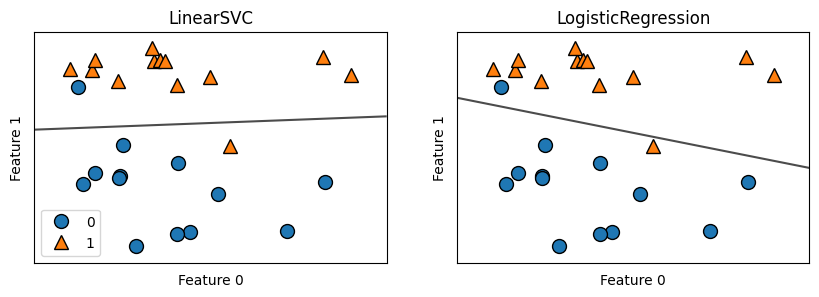

In [15]:
# LogisticRegression和LinearSVC在forge数据集上的决策边界（均为默认参数）
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize = (10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()], axes):
    clf = model.fit(X, y)

    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha = .7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()    


图中分别展示了 LinearSVC和 LogisticRegression 得到的决策边界，都是直线，将顶部归为类别1的区域和底部归为类别0的区域分开了。

两个模型得到了相似的决策边界。注意，两个模型中都有两个点的分类是错误的。两个模型都默认使用L2正则化，就像 Ridge 对回归所做的那样。

对于LogisticRegression 和 LinearSVC，决定正则化强度的权衡参数叫作C。c值越大，对应的正则化越弱。换句话说，如果参数C值较大，那么LogisticRegression和LinearSVC 将尽可能将训练集拟合到最好，而如果C值较小，那么模型更强调使系数向量(w)接近于0。    

较小的C值可以让算法尽量适应“大多数”数据点，而较大的c值更强调每个数据点都分类正确的重要性。

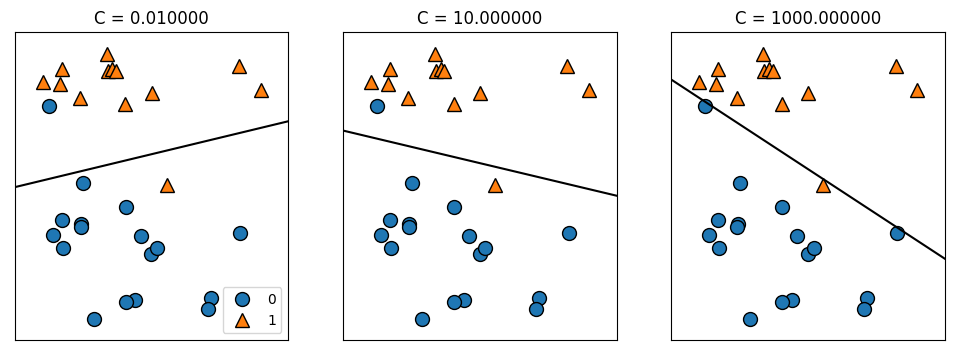

In [16]:
# 不同C值的线性SVM在forge数据集上的决策边界
mglearn.plots.plot_linear_svc_regularization()

与回归的情况类似，用于分类的线性模型在低维空间中看起来可能非常受限，决策边界只能是直线或平面。同样，在高维空间中，用于分类的线性模型变得非常强大，当考虑更多特征时，避免过拟合变得越来越重要

In [17]:
# 在乳腺癌数据上详细分析LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()


In [18]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,random_state=42)

In [20]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Train set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test, y_test)))

Train set score:0.944
Test set score:0.965


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1的默认值给出了相当好的性能。但由于训练集和测试集的性能非常接近，所以模型很可能是欠拟合的。我们尝试增大C来拟合一个更灵活的模型:

In [21]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Train set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

Train set score:0.955
Test set score:0.958


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


使用 C=100 可以得到更高的训练集精度，也得到了稍高的测试集精度,更复杂的模型应该性能更好。

In [22]:
# 使用正则化更强的模型
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Train set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

Train set score:0.934
Test set score:0.930


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


已经欠拟合的模型继续向左移动，训练集和测试集的精度都比采用默认参数时更小。

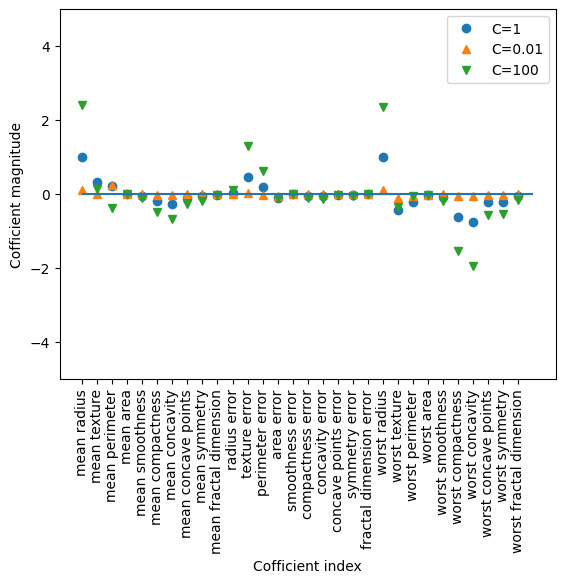

In [23]:
# 不同C值的logistic回归在乳腺癌数据集上学到的系数
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg001.coef_.T, '^', label = "C=0.01")
plt.plot(logreg100.coef_.T, 'v', label = "C=100")

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation = 90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Cofficient index")
plt.ylabel("Cofficient magnitude")
plt.legend()

由于LogisticRegression 默认应用L2正则化，所以其结果Ridge的结果类似。更强的正则化使得系数更趋向于0，但系数永远不会正好等于0。进一步观察图像，还可以在第3个系数那里发现有趣之处，这个系数是“平均周长”(mean perimeter)。C=100和C=1时，这个系数为负，而C=0.001时这个系数为正，其绝对值比 C=1时还要大。在对线性模型系数的解释应该始终持保留态度。

如果想要一个可解释性更强的模型，使用L1正则化可能更好，因为它约束模型只使用少数几个特征。

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


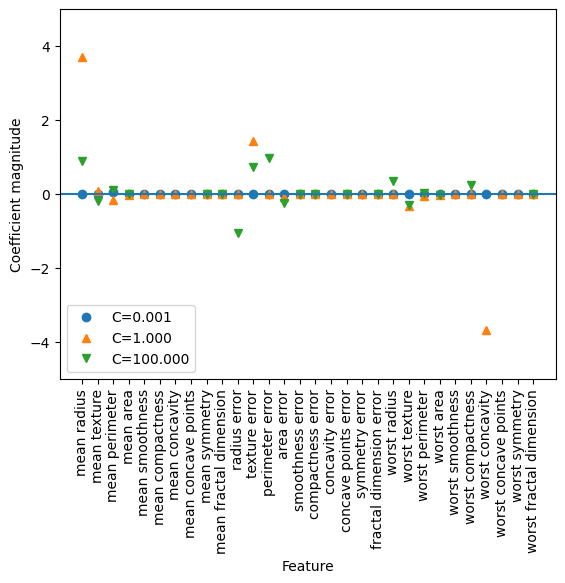

In [24]:
# 对于不同的C值，L1惩罚的Logistic回归在乳腺癌数据集上学到的系数
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

用于二分类的线性模型与用于回归的线性模型有许多相似之处。与用于回归的线性模型一样，模型的主要差别在于 penalty 参数，这个参数会影响正则化，也会影响模型是使用所有可用特征还是只选择特征的一个子集

## 6. 用于多分类的线性模型

许多线性分类模型只适用于二分类问题，不能轻易推广到多类别问题 (除了Logistic回归)。将二分类算法推广到多分类算法的一种常见方法是“一对其余”(one-vs-rest)方法。在“一对其余”方法中，对每个类别都学习一个二分类模型，将这个类别与所有其他类别尽量分开，这样就生成了与类别个数一样多的二分类模型。在测试点上运行所有二类分类器来进行预测。在对应类别上分数最高的分类器“胜出”.将这个类别标签返回作为预测结果。

每个类别都对应一个二类分类器，这样每个类别也都有一个系数 (w)向量和一个截距(b)。下面给出的是分类置信方程，其结果中最大值对应的类别即为预测的类别标签:

w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b

多分类 Logistic 回归背后的数学与“一对其余”方法稍有不同，但它也是对每个类别都有个系数向量和一个截距，也使用了相同的预测方法。

将“一对其余”方法应用在一个简单的三分类数据集上。用到一个二维数据集，每个类别的数据都是从一个高斯分布中采样得出的


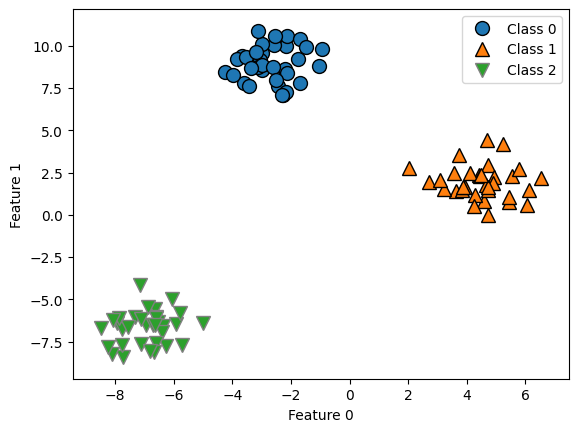

In [25]:
# 包含三个类别的二维玩具数据集
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2'])

在这个训练集上训练一个LinearSVC 分类器

In [26]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:",linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


coef_的形状是(3，2)，说明 coef_每行包含三个类别之一的系数向量，每列包含某个特征(这个数据集有2个特征)对应的系数值。现在intercept_是一维数组，保存每个类别的截距

将三个2分类器直线可视化

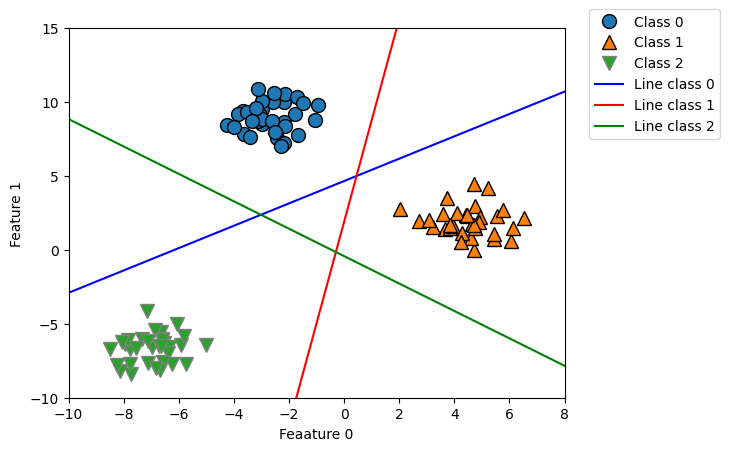

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feaature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1', 'Class 2','Line class 0', 'Line class 1','Line class 2'], loc=(1.05,0.7))
# 三个“一对其余”分类器学到的决策边界

图像中间的三角形区域属于哪一个类别呢，3 个二类分类器都将这一区域内的点划为“其余”。这里的点应该划归到哪一个类别呢?答案是分类方程结果最大的那个类别，即最接近的那条线对应的类别。

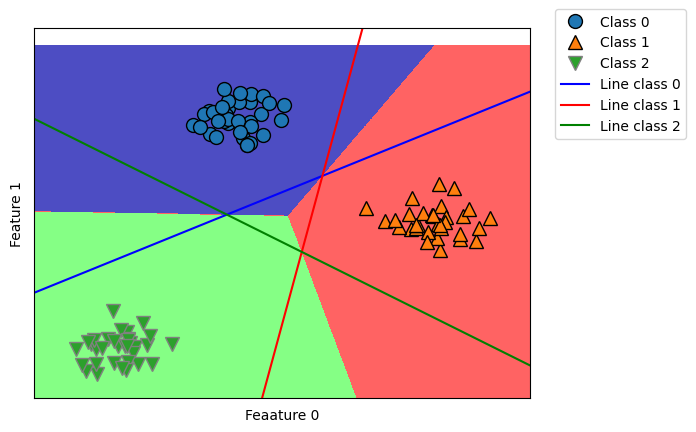

In [28]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) # 二维分类模型的决策边界
mglearn.discrete_scatter(X[:,0], X[:, 1], y) # 离散数据的散点图
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feaature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1', 'Class 2','Line class 0', 'Line class 1','Line class 2'], loc=(1.05,0.7))

## 7. 优点、缺点和参数

线性模型的主要参数是正则化参数，在回归模型中叫作 alpha，在 LinearSVC和LogisticRegression中叫作C。alpha 值较大或C值较小，说明模型比较简单。特别是对于回归模型而言，调节这些参数非常重要。通常在对数尺度上对C和alpha 进行搜索。你还需要确定的是用L1 正则化还是 L2 正则化。如果你假定只有几个特征是真正重要的，那么你应该用L1正则化，否则应默认使用L2 正则化。如果模型的可解释性很重要的话，使用LI也会有帮助。由于L1 只用到几个特征，所以更容易解释哪些特征对模型是重要的，以及这些特征的作用。

线性模型的训练速度非常快，预测速度也很快。这种模型可以推广到非常大的数据集，对稀疏数据也很有效。如果你的数据包含数十万甚至上百万个样本，你可能需要研究如何使用LogisticRegression和Ridge 模型的 solver='sag"选项，在处理大型数据时，这一选项比默认值要更快。其他选项还有SGDCLassifier类和SGDRegressor 类，它们的线性模型实现了可扩展性更强的版本

线性模型的另一个优点在于，利用我们之前见过的用于回归和分类的公式，理解如何进行预测是相对比较容易的。但是，往往并不完全清楚系数为什么是这样的。如果你的数据集中包含高度相关的特征，这一问题尤为突出。在这种情况下，可能很难对系数做出解释    
如果特征数量大于样本数量，线性模型的表现通常都很好。它也常用于非常大的数据集只是因为训练其他模型并不可行。但在更低维的空间中，其他模型的泛化性能可能更好